In [2]:
import pandas as pd
import numpy as np
import os

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [3]:
GCP_PROJECT = 'train-delays-406412'

BQ_DATASET = 'train_delays'

In [4]:
query = '''
SELECT * FROM `train-delays-406412.train_delays.train_delays_cleaned`
'''

In [5]:
from google.cloud import bigquery
from google.oauth2 import service_account
from pathlib import Path
#from params import *

def get_data_from_bq(
    gcp_project: 'train-delays-406412',
    query: str):
    client = bigquery.Client()
    query_job = client.query(query)
    result = query_job.result()
    df = result.to_dataframe()
    return df

In [25]:
df = get_data_from_bq(gcp_project=GCP_PROJECT, query=query)

In [26]:
!pwd

/home/ben/code/MathmoBen/TrainDelays


In [29]:
df_clean = pd.read_csv('/home/ben/code/MathmoBen/TrainDelays/clean_data.csv')

In [30]:
df_clean.head()

,TRAIN_SERVICE_CODE_AFFECTED,SERVICE_GROUP_CODE_AFFECTED,ENGLISH_DAY_TYPE,APP_TIMETABLE_FLAG_AFF,UNIT_CLASS_AFFECTED,INCIDENT_REASON,PERFORMANCE_EVENT_CODE,PFPI_MINUTES,Lat_OR,Lon_OR,...,ORIG_MINUTE_SIN,ORIG_MINUTE_COS,DEST_MONTH_SIN,DEST_MONTH_COS,DEST_DAY_SIN,DEST_DAY_COS,DEST_HOUR_SIN,DEST_HOUR_COS,DEST_MINUTE_SIN,DEST_MINUTE_COS
0,22214000,EK01,SA,Y,375.0,MD,M,9.0,51.54343,-0.02447,...,-1.000000,-1.836970e-16,0.951057,0.309017,7.431448e-01,0.669131,0.951057,0.309017,-0.978148,0.207912
1,22214000,EK01,WD,Y,378.0,MD,M,12.0,51.54343,-0.02447,...,-0.587785,-8.090170e-01,0.951057,0.309017,9.135455e-01,-0.406737,0.866025,0.500000,-0.809017,-0.587785
2,22214000,EK01,WD,Y,378.0,X8,M,8.0,51.54343,-0.02447,...,0.978148,-2.079117e-01,0.104528,0.994522,5.665539e-16,-1.000000,0.809017,-0.587785,0.913545,-0.406737
3,22214000,EK01,SA,Y,375.0,TG,M,10.0,51.54343,-0.02447,...,-0.309017,-9.510565e-01,0.913545,0.406737,5.877853e-01,-0.809017,0.913545,-0.406737,-0.207912,-0.978148
4,22214000,EK01,SA,Y,375.0,TG,M,11.0,51.54343,-0.02447,...,-0.669131,7.431448e-01,0.913545,0.406737,5.877853e-01,-0.809017,0.913545,-0.406737,-0.500000,0.866025


In [31]:
df_clean.columns

Index(['TRAIN_SERVICE_CODE_AFFECTED', 'SERVICE_GROUP_CODE_AFFECTED',
       'ENGLISH_DAY_TYPE', 'APP_TIMETABLE_FLAG_AFF', 'UNIT_CLASS_AFFECTED',
       'INCIDENT_REASON', 'PERFORMANCE_EVENT_CODE', 'PFPI_MINUTES', 'Lat_OR',
       'Lon_OR', 'Lat_DES', 'Lon_DES', 'ORIG_MONTH_SIN', 'ORIG_MONTH_COS',
       'ORIG_DAY_SIN', 'ORIG_DAY_COS', 'ORIG_HOUR_SIN', 'ORIG_HOUR_COS',
       'ORIG_MINUTE_SIN', 'ORIG_MINUTE_COS', 'DEST_MONTH_SIN',
       'DEST_MONTH_COS', 'DEST_DAY_SIN', 'DEST_DAY_COS', 'DEST_HOUR_SIN',
       'DEST_HOUR_COS', 'DEST_MINUTE_SIN', 'DEST_MINUTE_COS'],
      dtype='object')

In [32]:
import seaborn as sns

In [33]:
df_clean['PFPI_MINUTES'].max()

275.0

In [34]:
275 / 60.0

4.583333333333333

In [46]:
delay_lengths = pd.DataFrame(df_clean['PFPI_MINUTES'].value_counts())

In [52]:
delay_lengths.sort_values('1')

KeyError: '1'

In [54]:
delay_lengths.head()

,PFPI_MINUTES
3.0,124762
1.0,116431
4.0,57166
0.0,44965
2.0,44565


<AxesSubplot:ylabel='Frequency'>

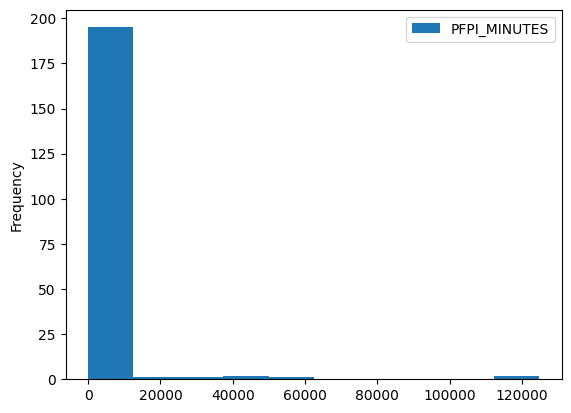

In [55]:
delay_lengths.plot.hist()

In [56]:
short_delays = delay_lengths.head()

In [57]:
type(short_delays)

pandas.core.frame.DataFrame

<AxesSubplot:ylabel='Frequency'>

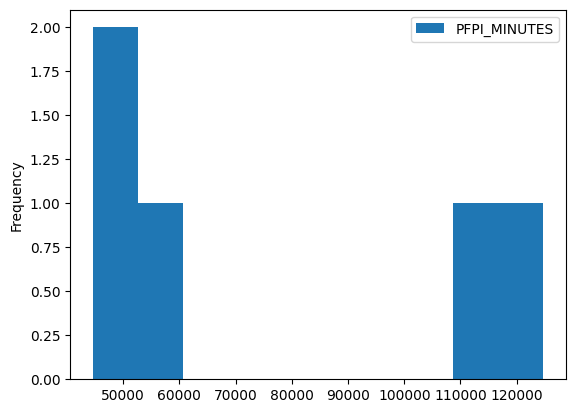

In [58]:
short_delays.plot.hist()